# <center>  Chapter 3: Modelling </center> 

## Learning Objectives
After processing this chapter you are able to:

> - read data from and write data to files
> - employ different fitting methods using Python
> - create a simplified simulation model for a photovoltaic system

In the last chapter, we learned the basics of programming and are now
able to program any kind of function. Remembering our examples from the
previous chapters, we notice that so far we have written programs which
simulate the solar resource while the exercises were concerned with
solar cells/modules.

In this chapter, we will take all of this and put it together to a basic
model which we will evaluate and hopefully improve. On the way, we will
learn how to handle data files in Python and to do data fitting, which is
often required to determine the model parameters.

## Reading from and writing to data files

In the case we want to model a certain phenomenon, we require some
observations and information about it. This is usually obtained via
measurements. Often the measurement equipment will deliver the
measurement data in a file so that it is important that you are able to
import your data.

##### File reading

With Python there exist multiple solutions on how to read data from
files. The preferred method depends a lot on the format of your data, and
if you are lucky enough to have properly defined data, the reading
process is rather easy.

**Formatted File**

The data in 'sm55ui.txt' is well formatted, that means each row in the
text file corresponds to one set of data and each field of the dataset
is separated by a defined delimiter symbol from another. Common
delimiter symbols are tabulators, spaces or semicolon.

For file handling the pandas library has many useful features.
Additionally, it allows us to import the file with comparatively little
and easy to read code. Therefore, let's get going with this easy method
to get you started.

In [3]:
import pandas as pd

df = pd.read_csv("sm55ui.txt", delimiter="\t", header = None) 
stc = df.iloc[0:30,0:2] 
ui_stc = stc.values

💡> <font color=red> Run the previous cell. Insert a cell below and check the values and types of `df`, `stc` and `ui_stc` <font/>

In the first line we import the `pandas` library to get access to its
features. The command `read_csv` is able to read well formatted files. CSV
means comma separated values, but despite this name we can also use other
delimiters such as the ones mentioned above. As we use a tabulator and
not the default comma as the separator, we have to specify this during
the call of the `read_csv()` function. The tabulator symbol is indicated
with `\t`. Also by default, this function will assume that the first line of
the file are the column names, as in our case there is no header, so we have
to specify this as well. Many more settings can be set for this
function, click [here](https://www.datacamp.com/community/tutorials/pandas-read-csv) for an example.

Pandas saves the read values in a structure called dataframe. Mind that
this dataframe has the meaning of a datatable, but it is different from a
NumPy array for example. Thus our NumPy functions to access the contents
of the dataframe will not work, but instead we must use the functions
provided by Pandas for dataframes.

The next line is an example for this. 'sm55ui.txt' contains $I(U)$ data
from 4 measurements, only the first measurement (the first 2 columns)
correspond to the measurement at standard test conditions. Here we are
only interested in the STC measurement and want to extract this subset
from the dataframe. For this we employ the `iloc[]` command, where `0:30`
means all the rows starting at row 0 just before (but not including) row
30, and `0:2` means all the columns starting at column 0 until just before
column 2.

In the last line, we convert the dataframe subset into a NumPy 2-dim
array so that we can use it further.

**Other File formats**

There also exist libraries that can read excel files such as the [xlrd
library](https://www.geeksforgeeks.org/reading-excel-file-using-python/). Consider the following listing where the first worksheet in an Excel file is read and then the contents of one specific cell printed.

``` python
loc = ("arbitraryfile.xlsx") 
wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0)

# Cell in row 3 and column K (remember that Excel starts counting at 1 and Python at 0) 

c = sheet.cell_value(2, 10)
```

If you have a non well formatted file you can also import it but the
code becomes much more complicated. Since we do not want to confuse you
right now and assume that in almost all cases you have a well formatted
file, we don't go into the details here. Nonetheless, here is the rough
outline:

1. Open the file and associate its location to a file handle variable.

2. Read the file line by line

3. Close the file so that it can be used again by the operating system (which blocks access to the file as long as it is read)

By default only one line is saved as variable, and reading the next line
overwrites the previous line. As a consequence, at the end, only the last
line will be saved. In order to save all of the lines, you have to write
some loop which appends each new line to the bottom of an array.

In each line you have now a string of characters. Basically, you now
have to go through this string almost character by character and give it
meaning. So for example, you could search for the delimiter characters
and split the line string into multiple smaller strings, which represent
the content in each column. In the case you have a data table with
numbers, be aware that actually you only have strings now and can not
yet perform mathematical operations. Thus, you probably have to
transform the substrings into numbers using for example the function
`float()`.

As you can see this process is much more complex and requires much more
code and understanding of string functions.

##### File writing

Often you might want to save the results of your calculations in a file
for later use. The easiest method to do so is to use the `savetxt()`
function from the NumPy library

```python
np.savetxt('file_name_and_path', 'data_matrix', 'settings');
```

It is useful to create a table (in the form of a matrix) prior to this
call, and simply refer to this table. This function may have a few
optional arguments and we will discuss some of the more useful ones.

They are added as consecutive arguments separated by commas. There exist
quite a few options which you can read up in the documentation. One of
the more common ones is the specification of the delimiter character,
e.g. (you could also set it to: `','` `';'` or `' '`).

Again, there exist many further functions for file writing. As the ones
mentioned should suffice for the moment, please refer to the Python
documentation when you require more complicated special functionality.

## Interpolation

In principle we only know (within the limits of the measurement
uncertainty) the values we have actually measured. In the case we are
interested in a value in between two measured data points, we can only
guess its value. This is called interpolation, and there exist several
methods for it which work better or worse depending on the situation.

The worst method you could probably do, is to employ a random polynomial
to fit your data and then calculate the values in between, due to the
nature of polynomials to inflect between data points, introducing local
maxima and minima where there would be none.

The most simple method is simply to check which of the actually measured
data points is *nearest* to the point of interest and then simply take
its value. While this method is viable if your original measured data is
of already high resolution in the range of interest it obviously can be
quite inaccurate.

The next best guess is a *linear* interpolation between neighboring data
points. For a given point of interest, we determine the previous and the
next actually measured data points and calculate the slope and intercept
of the connecting straight line. Using this very local linear function
(which is valid only between the two neighboring data points), we
calculate the value of the point of interest.

The linear interpolation results in sharp corners at the actually
measured data points. In many situations one might assume that the
change of the values is more smoothly. The *spline* interpolation
methods smooth the interpolated function by introducing curves.

Please notice that Excel is using the spline method by default and
consider the following thoughts concerning scientific transparency.

-   While spline interpolation results in nice curves where the plot is
    monotonously increasing or decreasing, it introduces local maxima and
    minima where the plot changes direction. As it is often required to
    determine the position of a local extremum, it is non advisable to
    use these guessed points. Using linear interpolation, the extremum
    will at least always be one of the really measured points which is
    preferable.

-   Another advantage of linear interpolation, is that it is immediately
    visible from the abrupt corners that linear interpolation has been
    employed. The more smooth curves suggest that the actual data was
    measured with higher resolution when no word is lost on the fact
    that interpolation was used. Also the interpolation method is not
    immediately transparent from looking at the graph.

Interpolation can also be used to synchronize the x-axes of your data in
the case the x-vector turned out to be different for each measurement.

The NumPy library provides a simple to use linear interpolation function

``` python
yValues_for_desired_xData = numpy.interp(desired_xData, xData, yData)
```

In the case you want to use one of the other interpolation methods, you
can find them in the SciPy library. Add the following line to your
header to import the SciPy interpolation functions

``` python
from scipy import interpolate as intp
```

The next steps may appear somewhat unconventional as we are not simply
calling a function as before. In order to understand completely what is
happening here, we would have to talk about object-oriented programming
which is out of the scope of this course. Essentially, we are creating
an instance (or object) of an abstract class of interpolation functions.
During the creation, we specifiy what kind of interpolation method we
want to use and on which data the interpolation is to be performed. The
handle to this object is then saved in the variable

``` python
ni_class = intp.interp1d(mVoltage, mCurrent, kind = "nearest")
```
Notice that so far no interpolation has taken place as for example we
have not yet provided the desired x-data points for which we want to
interpolate. Objects in object-oriented programming can contain
properties and methods. Methods are essentially functions the object can
perform. Consider `xi` the x-data points for which we want to
interpolate. Using the next line we call the interpolation method of our
previously created object and perform the actual interpolation. The
result is saved in the variable.

``` python
ni = ni_class(xi)
```

The interpolation method may be given as an optional string: `"linear"`, `"nearest"`, `"next"`, `"previous"`, `"cubic"`. In the case this option is omitted `"linear"` is the default method.

Unfortunately we cannot perform spline interpolation with this method.
To achieve this SciPy provides us with a designated interpolation
function. This time we don't use the class concept but nonetheless
require a two step process where we first set up the interpolation
settings and then perform the interpolation in a second step.

``` python
si_setup = intp.splrep(mVoltage, mCurrent, s=0) 
si = intp.splev(xi,si_setup,der=0)
```

In order to learn more about the details of the parameters `s` and `der`
we refer you to the [documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html#id5).

In the following example we will also introduce another useful function
from the NumPy library to create linearly spaced vectors:

``` python
linearly_spaced_vector = linspace(firstValue, finalValue, numberDatapoints);
```

>**Example 3.1 - Interpolate measurement data**
<br>
>The file 'sm55ui.txt' contains 4 sets of measurement data of the
photovoltaic module SM55. Every pair of
columns gives the results of one measurement (odd numbered column:
voltage, even numbered column: current). The measurements were performed
under 4 different environmental conditions.
<br>
>1. G = 1000 Wm$^{-2}$, T = 25 $^{\circ}$C
<br>
>2. G = 1000 Wm$^{-2}$, T = 45 $^{\circ}$C
<br>
>3.  G = 1000 Wm$^{-2}$, T = 60 $^{\circ}$C
<br>
>4.  G = 800 Wm$^{-2}$, T = 45 $^{\circ}$C

>Here we load just the first set of data and compare how the various
interpolation methods result in different guesses.
<br>
>*09_interpolate.py*

[(-0.5, 2.0), (19.95, 22.05)]

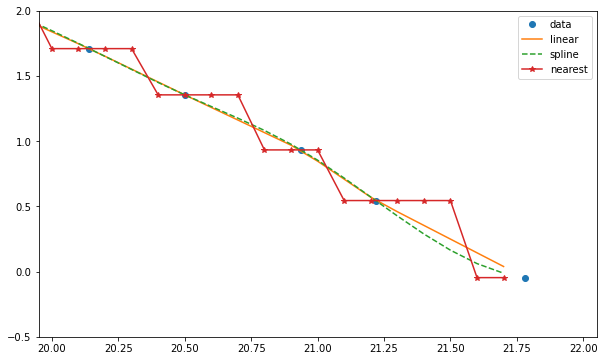

In [1]:
#Read file containing the measurement data of the PV panel 
import pandas as pd 
import numpy as np 
from scipy import interpolate as intp
import matplotlib.pyplot as plt

df = pd.read_csv("sm55ui.txt", delimiter="\t", header = None)
pv_stc_table=df.values

#Extract specific arrays from the data in the file 
mCurrent1 = np.transpose(pv_stc_table[0:23,1:2]) 
mVoltage1 = np.transpose(pv_stc_table[0:23,0:1])

mCurrent= mCurrent1[0] 
mVoltage=mVoltage1[0]

#Desired stepsize of the voltage axis 
xi = np.linspace(0,21.7,218)

#NumPy linear interpolation method 
li = np.interp(xi, mVoltage, mCurrent)

#SciPy nearest neighbor interpolation method 
ni_class = intp.interp1d(mVoltage, mCurrent, kind="nearest") 
ni = ni_class(xi)

#SciPy spline interpolation method 
si_setup = intp.splrep(mVoltage, mCurrent, s=0) 
si = intp.splev(xi, si_setup, der=0)

#Plot 
fig, ax = plt.subplots(figsize=(10,6)) 
ax.plot(mVoltage, mCurrent, "o", xi, li, "-", xi, si, "--", xi, ni, "*-") 
plt.legend(["data", "linear", "spline", "nearest"], loc="best") 
ax.set(xlim=(19.95, 22.05), ylim=(-0.5, 2))

## Fitting

All of the interpolation methods are purely mathematical and use only
very local numerical information to guess the data. However, there was no
real model behind their application and therefore their accuracy is
quite limited. When we want to discuss the measured data with respect to
a certain model then we need two things:

-   Model equations: One or multiple mathematical equations which
    describe the behavior of the phenomenon or system to be modelled
    (e.g. the solar cell equation for the electrical behavior of solar
    cells)

-   Model parameters: A set of parameters which are characteristic and
    constant for a specific implementation (e.g. the cell parameter
    saturation current density $I_0$ included in the solar cell
    equation)

The equations behind a model usually attempt to be a more generalized
description for related systems (e.g. all PV systems) rather than just
describe one very specific situation (e.g. one type of PV module). These
equations contain parameters, and the various systems are distinguished
by a different set of parameters, which makes it possible to compare the
systems by means of just a few numbers. These parameters may be purely
empirical or based upon actual physical properties (depending on the
sophistication of the model).

Finding the model equations can be quite a complex task. You should
refer to the literature in your specific topic to find any models for the
particular situation you are investigating. If that yields no results,
try to build a model from more fundamental theories. The most primitive
approach is to assume a polynomial function. This approach is valid due
to the theory of the Taylor series but only in a limited domain.
Therefore it is here especially important to evaluate the validity and
range of the model.

Often the model parameters are not known or reported in the literature
and have to be determined by measurements. By fitting the equations of
the suggested model to the measurement data, it is possible to determine
the model parameters for a specific system which can then be used for
subsequent simulations.Thus the information of a system can be reduced
to the general model equation and a small set of model parameters

##### Linear and Polynomial fit

By using the Taylor approximation any function can be approximated (in
the vicinity of a reference point) with a polynomial of order $n$:
$$p(x)=\sum_i^n a_i x^i$$

Therefore polynomials are often used to describe a behavior empirically
when no physical model is present (even though physical models also tend
to feature a polynomial behavior from time to time). The $a_i$ are
called the coefficients of order $i$. Especially linear fits (i.e.
polynomials of order $n=1$) are very often employed to indicate and
characterize trends.

Given a dataset and the order of the desired polynomial fit, the NumPy
library provides the function which returns the polynomial coefficients
in a vector of length $n+1$

``` python
 coefficient_array = numpy.polyfit(xData_array, yData_array, order)
```

Notice that the data set must contain at least $n+1$ data points to
obtain reasonable results. The first element of the coefficient array is
the coefficient for the highest order $n$, the second element the
coefficient for the order $n-1$ and so on ...

>**Example 3.2 - Polynomial Fit to determine Pt-100 parameters**
<br>
In the Winter Intro Lab you calibrated a Pt-100 sensor by recording its
resistance at known temperature fix points. The expected resistance for
temperatures in between those fix points can be approximated by a
quadratic function (i.e. a polynomial of order 2). By using a second
order polynomial fit on the three data points we use Python to determine
the coefficients.
<br>
*10_pt100_fit.py*

[-1.12175951e-04  3.88217595e-01  1.00000000e+02]


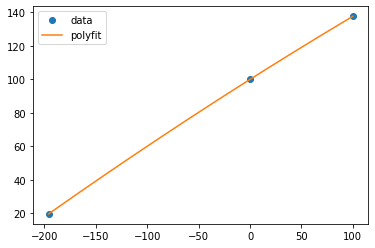

In [25]:
import numpy as np 
import matplotlib.pyplot as plt

#Measurements of the Pt-100 resistance at three different temperatures
T = [-196, 0, 100] #in Celsius 
R = [19.6, 100.0, 137.7] #in Ohms

n = 2 #Degree of polynomial

p = np.polyfit(T, R, n) 
print(p)

Ti = np.linspace(-196, 100, 297) 
fit_y = np.polyval(p, Ti) #Takes coefficients and calculates values at specified points

#Show results as figure 
fig, ax = plt.subplots() 
ax.plot(T,R, "o", Ti, fit_y, "-") 
plt.legend(["data", "polyfit"], loc="best")

Notice the very helpful function `polyval()` with which we can very
elegantly create the fit lines for the polynomials.

##### Non-linear curve fit

In the case a system does not behave according to a polynomial but
another arbitrary explicit function, we may employ the [least-squares](https://en.wikipedia.org/wiki/Least_squares) curve fitting method.
One of the most important non-linear functions is probably the
exponential function which often appears in physical systems.

The SciPy library Python provides a non-linear curve fitting function. Curve fitting is quite a wide topic, just note that there exist various
methods for non-linear curve fitting, you can specify the method of your
choice via a parameter. If you don't specify a parameter by default the
[Levenberg-Marquart algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm) is used which is a very competent least squares method that most of the time gets the job done.

As a first step you have to tell Python the model equation it shall use
for the fit. For this we define in the header (below the import part) our
model function as usual.

``` python
def funcion_name(xData_symbol, parameter_list): 
    return Equation
```

Example:

``` python
def exp_func(x, par1, par2): 
    return par1*numpy.exp(x*par2)
```

Notice, that the first parameter must be the x-variable of our function
and then follows a list of each fitting parameter.

The least-square method is an iterative process. That means we simply
guess an initial set of parameters for our function (which ideally
should already be in the ballpark of the expected final fitting
parameters) and the method will find an improved set of parameters which
fits the data points even better than the previous set. This is repeated
until the improvement of the fitting parameters is negligible in each
step and the last set of fitting parameters is returned.

Thus, we need to provide a set of initial parameters. The initial
parameters are provided in form of an array for example like:

``` python
pin = np.array([2,2])
```

Finally, we perform the fit by calling the fitting function. As
parameters it takes the name of the function we want to fit, the data
points as individual equal sized arrays for the x and y coordinates as
well as the array containing our initial parameters.

``` python
popt, pcov = scipy.optimize.curve_fit(model_function_name, xData_array, yData_array, initial_parameters)
```

As you can see the fitting function returns its results in two variable.
The first `popt` contains the obtained fitting parameter, while `pcov`
contains additional information that you may or may not find useful to
look at. Other options for the fitting function are available (such as
weighting the fit or bounding some parameters only to a certain
acceptable range) and we refer to the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) of the function if
you want to use those.

Beware that using this fitting method does not guarantee that a
reasonable set of fitting parameters is necessarily found. In the case
your model function does not describe the curve well or the initial
parameters are too far off, the fitting function might actually generate
worse fitting parameters in each iteration and the algorithm does not
converge. In this case Python returns an error interrupting the further
execution of your program.

Choosing a proper model function is of course very important as the
usefulness of the parameters is void if the model function does not
describe your data at all. Also important is that you try to use only
the least amount of model parameters as possible. Each parameter
introduces a further degree of freedom to the fit and it is possible
that the fitting solution is not unique, meaning that multiple
combinations of fitting parameters are all equally able to fit the
function well. This renders your obtained fitting parameters useless.

>**Example 3.3 - Determining PV module parameters**
<br>
In order to determine if the PV panel SM55 behaves according to the
Shockley theory we implement the function: $I(U)=I_{sc}+I_0(\exp (q\_nkT\cdot U)-1)$ with the three fitting
parameters $I_{sc}$, $I_0$ and $q\_nkT$ and find the best set of fit
parameters. Mind, that the data is actually a measurement of 36 cells in
series (the voltages add up). The solar cell equation is only valid for
a single cell, therefore we divide the Voltage array by 36 which we
later compensate again when we plot the result.
<br>
*11_nonlin_fit.py*

3.4741055574110766


[(-0.5, 4.0), (0.0, 22.05)]

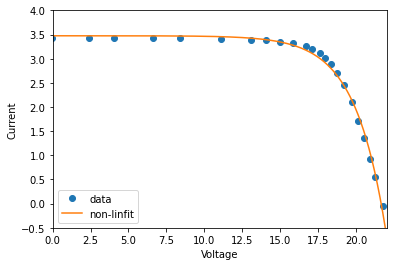

In [2]:
import pandas as pd
import numpy as np
import scipy.optimize as scipy_opt
import matplotlib.pyplot as plt

#Setup function to be fitted
def solarcell(x, Isc, I0, q_nkT):
    """"Solar cell equation"""
    return Isc+I0*(np.exp(x*q_nkT)-1)

#Read file containing the measurement data of the PV panel
df = pd.read_csv("sm55ui.txt", delimiter="\t", header = None, ) 
pv_stc_table=df.values

#Extract specific arrays from the data in the file
mCurrent1 = np.transpose(pv_stc_table[0:23,1:2])
mVoltage1 = np.transpose(pv_stc_table[0:23,0:1])

#The extraction above actually results in a nested array with only one element
# where within the element the actual array of interest is contained
mCurrent=mCurrent1[0]
mVoltage=mVoltage1[0]
#------------------------------------------------------
noCells=36
mVoltage=mVoltage/noCells

# Initial parameters
p0=4
p1=-1e-8
p2=44 #1/(kTq*n)
pin = np.array([p0, p1, p2])

# Perform the fit and print out the results
popt, pcov = scipy_opt.curve_fit(solarcell, mVoltage, mCurrent, p0=pin) 
print(popt[0])

xi = np.linspace(0,0.7,701) #x-axis points at which to evaluate polynomial for graph
fit_y= solarcell(xi, popt[0], popt[1], popt[2]) #Takes coefficients and calculates values at specified points

#---------------------------------------------------------------------
#Show results as figure
fig, ax = plt.subplots()
ax.plot(mVoltage*noCells, mCurrent, "o", xi*noCells, fit_y, "-") 
plt.legend(["data", "non-linfit"], loc="best")
ax.set(xlabel="Voltage", ylabel="Current")
ax.set(xlim=(0, 22.05), ylim=(-0.5, 4))

## Modelling

Modelling is a fundamental part of the scientific method to gain
knowledge in general and provides us with a method to express natural
phenomena or observations in formulaic terms. One of the most important
purposes of modelling is that it allows us to make predictions about the
future or not yet observed behavior which is a powerful tool in any
research or development.

Often it is much easier, faster and cheaper to perform measurements on
models than to perform them via real measurements. To distinguish
experiments on models from experiments on real systems we usually call
the experiments on models: simulations. The idea is to transfer the
results of the simulated experiments onto the real phenomenon which is
for example very effective when optimizing a system. Of course, this
transfer only works when the model is able to accurately predict the
real behavior which is why it is of the utmost importance to validate
the model first.

Not all models are computer models. There also exist physical models, two
of which you might encounter during the winter laboratories:

-   *Mini-Wind turbine:* The Reynold's number is a dimensionless
    parameter which describes if the flow of a fluid is laminar or
    turbulent. By designing miniature wind turbines the behavior of a
    full sized wind energy converter can be modelled much cheaper when
    the viscosity of the fluid is adjusted in such a way that the
    Reynold's number of both systems match.

-   *Equivalent circuit:* Complex electrical components such as solar
    cells or batteries are often modelled by means of equivalent
    circuits which are composed of well known basic electrical
    components even though they don't really exist in those devices.

Let us take a look at the routines we have programmed so far:

-   **Position of the sun:** The function in file *08sunposfunc.py*
    programmed in
    Example 2.6 calculates the azimuth and elevation of
    the sun when given the location coordinates and a point in time.

-   **Radiation Intensity on surface:** The function in file
    *06airmass-powerfunc.py* programmed in
    Example 2.4 calculates the attenuation of the solar
    radiation by the atmosphere when given the zenith angle.

-   **Attenuation factor for non direct orientation:** The function in
    file *07tiltfunc.py* programmed in
    Example 2.5 calculates the factor by which the
    radiation density is decreased when we cannot take it for granted
    that our device always faces the sun directly. The necessary
    arguments are the position of the sun and the orientation of the
    module .

-   **PV characteristics analyzer:** The function pvanalyzer() should
    have been programmed in Exercise 2.2 to determine the solar cell
    parameters when given an IU characteristic of a solar cell.

-   **Solar Module characteristics:** The function pvanalyzermaster has
    not been used so far as is. When you programmed the pvanalyzer()
    function in Exercise 2.2 however, you needed a calling script that
    provides arguments to the pvanalyzer function. If you translate this
    calling script into a function that takes the current solar
    radiation as its only parameter which will then effect the
    calculation of the Isc you are good to go.


As illustrated in Fig. 3.1 we build our model by connecting the interfaces
of the components.

<center><img src="img/03_modelling/model_py.png" width="350x"/></center>
<center>Figure 3.1: Basic PV System model (Source: own representation)</center>



Then process the model in the following sequence:

1.  We provide location parameters and obtain for a certain point in
    time the elevation and azimuth of the sun.

2.  We can use the elevation angle $\alpha$ to calculate the zenith
    angle $\zeta$ via: $\zeta=90^{\circ}-\alpha$

3.  This enables us to determine the radiation intensity for that point
    in time at our location. In order to speed up the calculation we can
    use a case differentiation structure which performs this calculation
    only at day (i.e. $\alpha>0$ and otherwise returns the radiation
    intensity 0).

4.  As our sample module is facing due south with a tilt equal to our
    latitude (that is how the South facade of the Energy lab is
    orientated) the module does not always see the full radiation
    intensity. Using the sun position and our system parameters we
    calculate the actual radiation intensity incident on the module.

5.  This radiation intensity results in a specific solar cell
    characteristic which we simulate with the function
    pvanalyzer_master.

6.  Yet, we are not interested in all the points but rather the maximum
    power point only, so we call the pvanalyzer function to provide the
    characteristic parameters (of which we only take the maximum power
    value). This kind of assumes we are using a Maximum Power Point
    Tracker

##### Evaluation

When we have connected the functions together correctly we can now
calculate the generated PV power at one specific point in time. In order
to judge the performance of a photovoltaic system it is useful to
simulate the performance over a full year. Therefore we require an
encapsulating script where we specify all of the location and system
parameters, create a time sequencer (for example via a loop) and call
the functions repeatedly to return the generated power at that point in
time.

Yet, just running the simulation for example for different locations or
different modules does not yet give any useful information (except maybe
a fancy plot). Whenever systems are compared it is attempted to
characterize the behavior using certain measures for evaluation. These
may or may not be reasonable for the situation you are investigating but
at least they make it possible to quantify a behavior and compare
different systems.

The most simple evaluation measure which could be used here is probably
the annual energy yield $Y$ of the PV system. Assuming the generated
power $P_i$ during a time step $i$ to be more or less constant we simply
multiply the generated power with the duration of the time step
$\Delta t$ to calculate energy obtained in that time period. Then we add
all the energies per time interval to get the annual energy yield.

$$Y = \sum_i P_i \Delta t$$

>**Example 3.4 - Annual PV energy yield**
<br>
Let's create the encapsulating script including the evaluation measure.
We assume that all the needed functions from previous examples have been defined or imported in the header as well as the
usual libraries.
<br>
*12annualyield.py*

``` python
...
timestep = (1/24)
Time=np.arange(0,365,timestep) #1 year in hourly timesteps

pvP=np.empty(Time.size)
AnnEnergyYield=0; #Initial value of cumulative sum

i=0
while i<Time.size:

    #Initial Parameters
    DayOfYear=np.floor(Time[i])
    LocalTime = Time[i]-DayOfYear

    TimeZone=+1 #Difference to Greenwich Mean Time GMT
    SummerTime=0 #1=TRUE, 0=FALSE
    Longitude=8.213889  #Oldenburg (in degrees)
    Latitude=53.143889 #Oldenburg (in degrees)

    #Sun position
    position = sunpos(DayOfYear, TimeZone, SummerTime, LocalTime, Longitude, Latitude)

    alpha=position[0]
    phi=position[1]

    #Global irradiance after passing through atmosphere
    AngleFromZenith=90-alpha
    G = airmasspower(AngleFromZenith)

    #Global irradiance on tilted surface (SHS system)
    if (alpha<0):
        Gmod=0
    else:
        Gmod=G*tilt(alpha, phi, -Latitude,0)
        
    pvP[i] = pvanalyzer_master(Gmod)
    
    #Calculate Energy=Power*Time harvested in time period
    if (i<Time.size-1):
         timestep=(Time[i+1]-Time[i])*24 #in hours
    else:
        timestep=1 #1h 
   
    AnnEnergyYield=AnnEnergyYield+(pvP[i]*timestep) #Energy in Watt hours
    
    i=i+1 #Let's not forget the increment for the loop

print(AnnEnergyYield)
```

Notice that we ignore the daylight savings time parameter. For the
calculation of the yield it does not make a difference it would just be
important when we wanted to correlate universal time to local time.